In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [4]:
# Load and preprocess the data
data = pd.read_csv('Data1_Columbia.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Split data into input (X) and output (y) variables
sequence_length = 10  # Length of the input sequence
X = []
y = []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X = np.array(X)
y = np.array(y)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19456     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [25]:
# Fit the model and store the training history
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/15
386/386 [==============================] - 4s 11ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 2/15
386/386 [==============================] - 4s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 3/15
386/386 [==============================] - 4s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/15
386/386 [==============================] - 4s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/15
386/386 [==============================] - 3s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6/15
386/386 [==============================] - 3s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 7/15
386/386 [==============================] - 3s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/15
386/386 [==============================] - 3s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/15
386/386 [==============================] - 3s 9ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9: early stopping


In [26]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

In [27]:
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Train Loss: 0.0019789596553891897
Test Loss: 0.0018859750125557184


In [39]:
# Make predictions
predictions = model.predict(X_test)

97/97 [==============================] - 0s 3ms/step


In [40]:
# Print some example predictions and actual values
for i in range(10):
    print("Predicted rainfall:", predictions[i])
    print("Actual rainfall:", X_test[i])

Predicted rainfall: [0.9802589]
Actual rainfall: [[0.90462263 0.99797038 0.9977223  0.99808721 0.99798912 0.99669513
  0.98258478 0.98795335 0.99132297 0.93689299 0.99958203]
 [0.90469507 0.99873756 0.99827712 0.99897078 0.99854284 0.9970071
  0.98086159 0.98942342 0.99269146 0.9244682  0.99959111]
 [0.90494861 0.99847536 0.99865674 0.99872804 0.99845541 0.99805023
  0.98636114 0.99002526 0.99416904 0.94982778 0.99960929]
 [0.90470412 0.998252   0.99875408 0.99819402 0.99840684 0.99845968
  0.98900092 0.99033111 0.99478387 0.96304345 0.99949116]
 [0.90463168 0.99834911 0.99848153 0.99836879 0.9984457  0.99783575
  0.98584785 0.98998579 0.99347488 0.96752258 0.99948208]
 [0.90463168 0.99859189 0.9984426  0.99866979 0.99868856 0.99750429
  0.98350137 0.98899917 0.99317738 0.9441956  0.99956385]
 [0.90462263 0.99841709 0.99849126 0.99850472 0.99862056 0.99777726
  0.98538955 0.98925569 0.99315755 0.92326341 0.9995366 ]
 [0.90462263 0.99843651 0.99867621 0.9984853  0.99855255 0.99812822
  

In [41]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
accuracy = 100 - mape

print("Overall Rainfall Accuracy: {:.2f}%".format(accuracy))

Overall Rainfall Accuracy: 96.81%


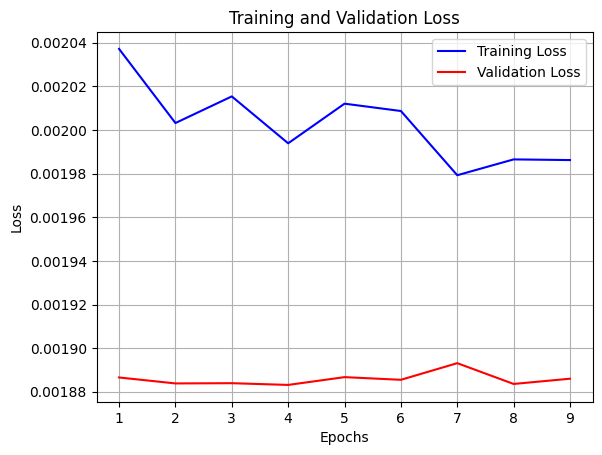

In [42]:
import matplotlib.pyplot as plt

# Access the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the graph
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
